In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import re

throws = {"rock": "paper", "scissors": "rock", "paper" : "scissors"}
answer = re.compile(r"(YES)|(Y)")
answer2 = re.compile(r"(NO)|(N)")

def win(p1_score, p2_score, draw, index):
    while True:
        try:
            count = int(input("How Many Rounds Do You Want to Play?: "))
            break
        except ValueError:
            print("Enter a Number!")
            
    for i in range(count):
        player1 = random.choice(list(throws.keys()))
        player2 = random.choice(list(throws.keys()))
        
        if player1 == throws[player2]:
            p1_score.append(1)
            p2_score.append(0)
            draw.append(0)
            index.append(f"PLAYER1 WINS {player1} {player2}")
        
        elif player2 == throws[player1]:
            p1_score.append(0)
            p2_score.append(1)
            draw.append(0)
            index.append(f"PLAYER2 WINS {player2} {player1}")
 
        else:
            p2_score.append(0)
            p1_score.append(0)
            draw.append(1)
            index.append(f"DRAW {player1} {player2}")
            
        
    score = pd.DataFrame({"Player1_Score": p1_score, "Player2_Score": p2_score, "Draws": draw})
    score.index = index
    score.loc["Total", :] = [sum(score.Player1_Score), sum(score.Player2_Score), sum(score.Draws)] 
    score = score.astype(int)
    print(score)
    
    test = input("Do you want to continue? Y/N: ").upper()
    while answer.search(test) is None and answer2.search(test) is None:      
        test = input("Do you want to continue? Y/N: ").upper()
        
    if answer.search(test):
        return win([], [], [], [])

    elif answer2.search(test):
        print(score)
        index = []
        
    fig = plt.figure()
    fig.patch.set_facecolor('black')
    plt.rcParams['text.color'] = 'white'
    
    plt.title("Player1 Wins" if score.Player1_Score["Total"] > score.Player2_Score["Total"] \
    else "Player2 Wins" if score.Player2_Score["Total"] > score.Player1_Score["Total"] else "Draw")
    patches, texts, autotexts = plt.pie(score.loc["Total", :].values,labels = ["Player1", "Player2", "Draw"], \
                                autopct = "%1.1f%%", pctdistance = 0.8, explode  = [0.01,0.01,0.01])
    
    hole = plt.Circle((0, 0), 0.65, facecolor='black')
    plt.gcf().gca().add_artist(hole)
    
    for autotext in autotexts:
        autotext.set_horizontalalignment('center')
        autotext.set_fontstyle('italic')

How Many Rounds Do You Want to Play?:  10


                             Player1_Score  Player2_Score  Draws
DRAW rock rock                           0              0      1
PLAYER1 WINS paper rock                  1              0      0
PLAYER1 WINS rock scissors               1              0      0
PLAYER1 WINS scissors paper              1              0      0
DRAW paper paper                         0              0      1
DRAW paper paper                         0              0      1
PLAYER2 WINS scissors paper              0              1      0
PLAYER1 WINS rock scissors               1              0      0
PLAYER2 WINS paper rock                  0              1      0
PLAYER2 WINS paper rock                  0              1      0
Total                                    4              3      3


Do you want to continue? Y/N:  Ifsidkhsidhs
Do you want to continue? Y/N:  ldjsidhjs
Do you want to continue? Y/N:  siodhsihds
Do you want to continue? Y/N:  sdlhsds
Do you want to continue? Y/N:  Y
How Many Rounds Do You Want to Play?:  6


                             Player1_Score  Player2_Score  Draws
PLAYER2 WINS rock scissors               0              1      0
PLAYER2 WINS rock scissors               0              1      0
DRAW scissors scissors                   0              0      1
PLAYER1 WINS paper rock                  1              0      0
PLAYER2 WINS paper rock                  0              1      0
PLAYER1 WINS scissors paper              1              0      0
Total                                    2              3      1


Do you want to continue? Y/N:  dkweih
Do you want to continue? Y/N:  dishdsud
Do you want to continue? Y/N:  dsidgsudgsgdu
Do you want to continue? Y/N:  sdihshidsidhsihdsih
Do you want to continue? Y/N:  dosdhsodsohdsodshodsdosodhsodhsodsodsohdhos
Do you want to continue? Y/N:  N


                             Player1_Score  Player2_Score  Draws
PLAYER2 WINS rock scissors               0              1      0
PLAYER2 WINS rock scissors               0              1      0
DRAW scissors scissors                   0              0      1
PLAYER1 WINS paper rock                  1              0      0
PLAYER2 WINS paper rock                  0              1      0
PLAYER1 WINS scissors paper              1              0      0
Total                                    2              3      1


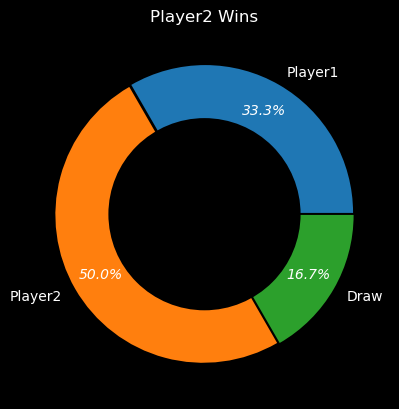

In [2]:
win([], [], [], [])